# Forsøksplanlegging 2
### Prosjektmodul i ISTx1001

## Motivasjon

Vi skal studere situasjoner/prosesser/etc der flere faktorer (forklaringsvariabler, kovariater, uavhengige variabler, x-variabler, ...) antas å være assosiert med et (kontinuerlig) utkomme (responsvariabel, avhengig variabel, y-variabel, ...). 

*Eksempel 1:*
En full-ladet el-bil vil kunne kjøre en distanse på $Y$ km før batteriet er tomt. Men distansen $Y$ er forbundet med usikkerhet og avhenger potensielt av flere faktorer, for eksempel sesong (sommer/vinter), kjøremønster (motorvei/bykjøring) og bilens vekt (mye/ingen bagasje). Vi er interessert i å finne ut hvilke av disse faktorene (forklaringsvariablene) som har størst effekt på el-bilens rekkevidde (responsvariabelen $Y$). I året som har gått har bilens eier skrevet ned noen observasjoner. Bilens eier oppgir at hen alltid full-ladet bilen når batteriet var på $20\%$, og informasjon om tre perioder med kjøring (mellom fulladet bil og $20\%$ kapasitet) er gitt i tabellen under.

| Periode  |  Sesong   | Kjøremønster | Vekt     | Rekkevidde |
| -------- | -------    | -------- | --------     | -------- |
| 1 | Vinter | By       | Lett | 311 km |
| 2 | Sommer | Motorvei | Tung | 314 km |
| 3 | Vinter | Motorvei | Tung | 297 km |

Vi ser at den lengste rekkevidden ble oppnådd om sommeren, på motorvei, og med tung bil. På vinterstid på motorvei, og med tung bil var derimot rekkevidden 17 km kortere, noe som indikerer at batteriet lades fortere ut ved kjøring på vinterføre. Vi kan trekke denne konklusjonen om sommer/vinter fordi de to andre faktorene (kjøremønster og vekt) var helt like i periode 2 og 3 i dataene. Vi har derimot ingen mulighet til å gjøre lignende sammenligner for kjøremønster eller vekt, og vi kan heller ikke avgjøre om kombinasjoner av faktorer har en samspillseffekt. Merk også at vi trakk konklusjonen om vinterføre mot sommerføre basert på kun to observasjoner, og vi kan selvfølgelig ikke utelukke at den observerte forskjellen bare skyldes tilfeldig variasjon (ikke statistisk signifikans). 

## Faktorielle forsøk

I faktorielle forsøk er vi interessert i å studere sammenhengen mellom flere faktorer (kovariater, forklaringsvariabler, osv.) og en responsvariabel. Faktorene i studien kan ta verdier på 2 eller flere nivåer (f.eks årstid). Vi skal studere *komplette* forsøk der alle kombinasjoner av faktorenes nivåer undersøkes. 

Eksempelvis kan vi studere effekten av faktorene A og B på en respons $Y$. Dersom faktor A har $a$ nivåer og faktor B har $b$ nivåer, så har vi totalt sett $a \cdot b$ mulige kombinasjoner av nivåer på de to faktorene og et komplett $a \times b$ faktorielt forsøk vil bestå av $ab$ faktorkombinasjoner. Antallet faktorkombinasjoner (og dermed antall forsøk vi må gjennomføre) vokser raskt når antall faktorer og antall nivåer per faktor øker. Derfor er det vanlig å begrense omfanget ved å definere *to nivåer* per faktor. Dette kalles 2-nivå faktorielle forsøk. 

*Eksempel 1 (fortsettelse):* For el-bilens rekkevidde så vi på tre faktorer og for hver av disse faktorene definerte vi to nivåer. Et komplett faktorielt forsøk her vil derfor bestå av $2\cdot 2\cdot 2 = 8$ faktorkombinasjoner, gjerne kalt et $2^3$ faktorielt forsøk. 

En enkeltmåling $y$ av responsvariabelen $Y$ (f.eks rekkevidde til elbil) som gjøres for en bestemt faktorkombinasjon vil være forbundet med usikkerhet (naturlig variasjon, støy). Det er derfor vanlig at en studie inneholder *gjentak* av alle faktorkombinasjonene. Rekkefølgen faktorkombinasjonene gjennomføres i må være *randomisert*, og dersom ikke alle forsøkene kan gjennomføres innenfor en rimelig tidsramme kan vi dele opp forsøket i *blokker*.

## 2-nivå faktorielle forsøk

Vi skal her gjennomgå notasjon og metode for gjennomføring og analyse av 2-nivå faktorielle forsøk. Som illustrasjon vil vi bruke et $2^2$ forsøk. Dypere forståelse får du ved å arbeide med flere eksempler som er tilgjengelige som egne notatbøker. Du bør også se emnets temavideoer og lese i kompendiet. 

Du kommer til å trenge disse pakkene for å kjøre Python-kode underveis i denne notatboken:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats

Vi skal også benytte oss av noen ferdig skrevne funksjoner fra notatboken DOEfunksjoner.ipynb:

In [19]:
run DOEfunksjoner.ipynb 

Følgende nøkkelord vil være sentrale for forståelse og kjennskap til faktorielle forsøk og forsøksplanlegging generelt: 

*respons, faktor, interaksjon, gjentak, blokkdeling, hovedeffekt og samspillseffekt, signifikans*

Vi skal også se på ulike metoder for å visualisere forsøkene og resultatene av disse. Husk at analyser av faktorielle forsøk er nært knyttet til multippel lineær regresjon og vi kommer dermed til å bruke Python-funksjoner for lineær regresjon for å analysere data. Samtidig vil vi vise hvordan effekterestimater kan regnes ut for hånd. 

### Forsøksdesign

Vi skal se på et generelt $2^2$ faktorielt forsøk der vi er interessert i hvordan faktorene $A$ og $B$ påvirker en respons $Y$. For faktorene har vi definert to nivåer. Disse to nivåene presenteres ofte som

- Lavt og høyt nivå, eller
- $-1$ og $+1$, eller
- $-$ og $+$

Vi bruker $-1$ og $+1$ som numerisk kodingen av faktor-nivåene som vi skal bruke når vi analyserer forsøket. Vi lar variabelen $x_1$ representere faktor A slik at $x_1 = -1$ når A er på lavt nivå og $x_1 = 1$ når A er på høyt nivå. Tilsvarende vil $x_2 \in \{-1,1\}$ representere høyt og lavt nivå for faktor B.

De tre tabellene under illustrerer forsøksdesignet for et $2^2$ faktorielt forsøk:

<table> <tr><td>
    
| Forsøksnr. |
|:--------:|
| 1 |
| 2 |
| 3 |
| 4 |
</td><td>

| Faktor A | Faktor B |
|:--------:|:--------:|
| Lavt nivå | Lavt nivå |
| Høyt nivå | Høyt nivå | 
| Lavt nivå | Høyt nivå |
| Høyt nivå | Høyt nivå |

</td><td>

| Faktor A ($x_1$) | Faktor B ($x_2$) |
|:--------:|:--------:|
| $-1$ | $-1$ |
| $+1$ | $-1$ | 
| $-1$ | $+1$ |
| $+1$ | $+1$ |

</td><td>

| Faktor A ($x_1$) | Faktor B ($x_2$) |
|:--------:|:--------:|
| $-$ | $-$ |
| $+$ | $-$ | 
| $-$ | $+$ |
| $+$ | $+$ |
</td></tr> </table>

Et $2^2$ forsøk består av $2^2 = 4$ faktorkombinasjoner. Når målinger gjøres (faktor A og B settes til en av kombinasjonene og responsen $Y$ måles) skal rekkefølgen på kombinasjonene randomiseres. Python-koden under lager en tilfeldig rekkefølge av de fire faktorkombinasjonene:

In [3]:
forsok = np.arange(1,5)
np.random.shuffle(forsok)
print(forsok)

[1 4 3 2]


### Resultater og effekter
Anta at forsøket har blitt gjennomført én gang, altså en måling per faktorkombinasjon. Designmatrisa og tilhørende observasjoner av $Y$ er presentert i tabellen:

| Nr | Faktor A ($x_1$) | Faktor B ($x_2$) | Utfall ($y$) |
|:--------:|:--------:|:--------:|:--------:|
|1| $-1$ | $-1$ | 11 |
|2| $+1$ | $-1$ | 20 |
|3| $-1$ | $+1$ | 18 |
|4| $+1$ | $+1$ | 19 |

Python-koden under oppsummerer den samme informasjonen.

In [3]:
X = tofaktorDOE(k=2)
y = np.array([11,20,18,19])

tab = np.column_stack([X, y])
colnames = ["x1", "x2", "y"]
df = pd.DataFrame(tab, columns=colnames)

df # merk 0-indeksering i Python

,x1,x2,y
0,-1.0,-1.0,11.0
1,1.0,-1.0,20.0
2,-1.0,1.0,18.0
3,1.0,1.0,19.0


### Hovedeffekter

*Definisjon:* Hovedeffekten av en faktor i et 2-faktorielt forsøk er forventet gjennomsnittlig respons når faktoren er på et høyt nivå minus forventet gjennomsnittlig respons når faktoren er på et lavt nivå. 

Vi estimerer hovedeffekter ved å se på observasjoner i forsøket vårt. For faktor A vil estimert hovedeffekt være

$\hat{A} = \frac{20 + 19}{2} - \frac{11+18}{2} = 5.0$

og for faktor B er estimert hovedeffekt

$\hat{B} = \frac{18 + 19}{2} - \frac{11+20}{2} = 3.0$

Vi ser at faktor A har en noe større estimert hovedeffekt enn faktor B. Disse effektene kan vi også illustrere med såkalte hovedeffektsplott. Jo brattere linje, jo større hovedeffekt. Merk at stigningstallet til linjene i disse plottene vil være de estimerte hovedeffektene delt på 2. Det er fordi et stigningstall representerer endring på $y$-aksen når vi gjør en enhets endring i $x$, mens hovedeffekten tilsvarer endring i to enheter i $x$ (fra -1 til +1).

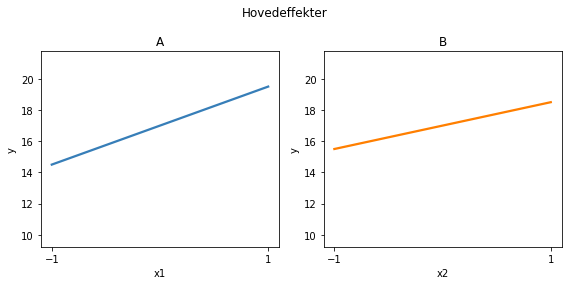

In [4]:
hovedeffektsplott(data = df,k = 2, observasjoner = False)  # sett observasjoner = True hvis du også vil se observasjonene

### Samspillseffekt (interaksjon)

En samspillseffekt eksisterer dersom forventet endring i responsen $Y$ når en faktor går fra lavt til høyt nivå avhenger av nivået til de andre faktorene. 

*Definisjon:* Halvparten av hovedeffekten av en faktor når den andre er på høyt nivå minus halvparten av hovedeffekten av faktoren når den andre er på lavt
nivå. 

I eksempelet vårt kan vi estimere samspillseffekten til faktorene $A$ og $B$. Først estimerer vi hovedeffekten av $A$ når $B$ er på et høyt nivå; $19-18 = 1$ og deretter hovedeffekten av $A$ når $B$ er på et lavt nivå: $20-11 = 9$. Deretter tar vi differansen til halvparten av disse: 

$\hat{AB} = \frac{1}{2}(19-18) - \frac{1}{2}(20-11) =  \frac{1}{2} - \frac{9}{2} = -4.0$

Også for interaksjoner/samspillseffekter er det nyttig å lage en figur. Figuren under viser effekten av faktor A når faktoren B er på henholdsvis lavt (svart linje) og høyt (rød linje) nivå. Dersom det ikke eksisterer en samspillseffekt så er disse linjene parallelle. 

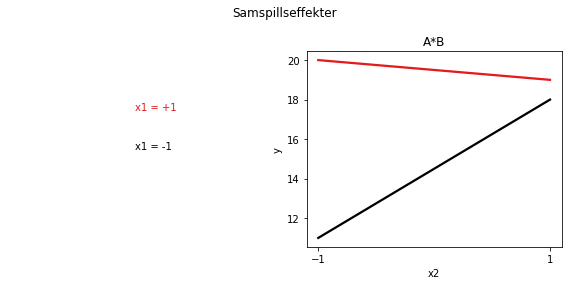

In [5]:
samspillsplott(df,2)

### Multippel lineær regresjon
Vi kan representere analysen vi har gjort til nå med en regresjonsmodell på formen $\text{E}(Y) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{12}x_{1}x_{2}$. De fire koeffisientene i modellen kan vi regne ut med Python-funksjoner for lineær regresjon:

In [20]:
modell1 = smf.ols('y~x1+x2+x1*x2', data=df).fit()
print(modell1.params)

Intercept    17.0
x1            2.5
x2            1.5
x1:x2        -2.0
dtype: float64


Merk at parameterne $\beta_1$ og $\beta_2$, estimert til å være 2.5 og 1.5, representerer stigningstallene til linjene i hovedeffeksplottene. Hovedeffektene $\hat{A}$ og $\hat{B}$ finner vi ved å gange disse estimatene med to:

$\hat{A} = 2 \cdot \hat{\beta}_1  = 2 \cdot 2.5 = 5.0$ og

$\hat{B} = 2 \cdot \hat{\beta}_2  = 2 \cdot 1.5 = 3.0$

På samme måte finner vi samspillseffekten ved å gange $\hat{\beta}_{12}$ med to:

$\hat{AB} = 2 \cdot \hat{\beta}_{12} = 2 \cdot (-2.0) = -4.0$

Effektestimatene $\hat{A}$, $\hat{B}$ og $\hat{AB}$ er direkte sammenlignbare i den forstand at de representerer en forventet endring mellom høyt og lavt nivå. Vi kan visualisere dem i rekkefølge etter største absolutte effektstørrelse i et stolpedigram (gjerne kalt paretoplott).

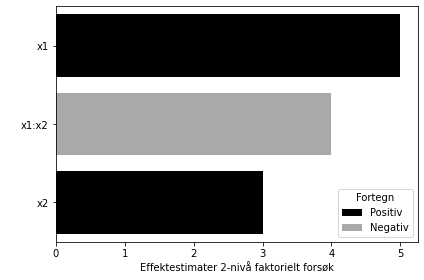

In [21]:
DOEparetoplott(modell1)

#### Normalantagelse og statistisk inferens

Merk at effektestimatene kunne regnes ut uten at vi gjorde noen spesifikke antagelser om fordelingen til responsvariabelen $Y$, bortsett fra $\text{E}(Y) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{12}x_{1}x_{2}$. Dersom vi i tillegg kan anta at $Y$ er tilnærmet normalfordelt med varians $\text{Var}(Y) = \sigma^2$ ved alle faktorkombinasjoner så kan vi også finne konfidensintervaller og utføre $t$-tester på koeffisientene $\beta_1$, $\beta_2$ og $\beta_{12}$ i regresjonsmodellen. I så fall kan vi også teste om de ulike faktorene, og samspillet mellom dem, har en statisisk signifikant sammenheng med responsvariabelen. 

Vi antar derfor at $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{12}x_{1}x_{2} + \varepsilon$, der $\varepsilon \sim N(0, \sigma)$. Merk at denne modellen består av 5 parametere; $\beta_0$, $\beta_1$, $\beta_2$, $\beta_{12}$ og $\sigma$. For å si noe om usikkerheten i effektestimatene må vi først estimere $\sigma$, men med bare 4 observasjoner har vi ikke nok informasjon i dataene til å gjøre det ($s^2 = \frac{0}{0}$). Siden vi har brukt 4 observasjoner til å tilpasse regresjonsmodellen har vi ikke nok informasjon i dataene til å si noe om usikkerhet i estimatene. Vi sier gjerne at vi har brukt opp alle frihetsgradene. Vi kan ikke estimere $\sigma$ og derfor ikke gjennomføre hypotesetester på parameterne i modellen. Skriv ut `modell1.summary()` for å se hvordan hele modellsammendraget ser ut i dette tilfellet.

In [22]:
print(modell1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 20 Oct 2023   Prob (F-statistic):                nan
Time:                        14:23:00   Log-Likelihood:                 127.41
No. Observations:                   4   AIC:                            -246.8
Df Residuals:                       0   BIC:                            -249.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0000        inf          0        n

/Users/theabj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/theabj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/theabj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/theabj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/Users/theabj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model

### Gjentak

Vi skal nå gjenta (repetere) forsøket vårt, altså måle $Y$ for alle de fire faktorkombinasjonene våre en gang til. Det vil si at det totalt blir gjort $4+4=8$ enkeltforsøk. 

Resultatet av forsøkene er presentert i tabellen under:

| Nr | Faktor A ($x_1$) | Faktor B ($x_2$) | Rep. 1 ($y$) | Rep. 2 ($y$) | Gjennomsnitt ($\bar{y}$)|
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|1| $-1$ | $-1$ | 11 | 13 | $\bar{y}_1 = 12$ |
|2| $+1$ | $-1$ | 20 | 18 | $\bar{y}_2 = 19$ | 
|3| $-1$ | $+1$ | 18 | 16 | $\bar{y}_3 = 17$ | 
|4| $+1$ | $+1$ | 19 | 23 | $\bar{y}_4 = 21$ | 

Vi estimerer hovedeffekter ved å se på gjennomsnitt av observasjoner i forsøket vårt (siste kolonne). For faktor A vil estimert hovedeffekt være

$\hat{A} = \frac{19 + 21}{2} - \frac{12+17}{2} = 5.5$

og for faktor B er estimert hovedeffekt

$\hat{B} = \frac{17 + 21}{2} - \frac{12+19}{2} = 3.5$

Samspillseffekten blir nå:

$\hat{AB} = \frac{1}{2}(21-17) - \frac{1}{2}(19-12) =  \frac{4}{2} - \frac{7}{2} = -1.5$

#### Gjentak i Python

In [23]:
# data-matrise
Xrep1 = tofaktorDOE(k=2)
Xrep2 = Xrep1 # x-verdiene holdes like i de to gjentakene

yrep1 = np.array([11,20,18,19])
yrep2 = np.array([13,18,16,23]) # målingene/observasjonene vil variere mellom gjentak

X = np.concatenate([Xrep1, Xrep2])
y = np.concatenate([yrep1,yrep2])

tab = np.column_stack([X, y])
colnames = ["x1", "x2", "y"]
dfgjentak = pd.DataFrame(tab, columns=colnames)

print(dfgjentak) # merk 0-indeksering i Python og merk at vi ikke manuelt regner ut gjennomsnittene over to gjentak

    x1   x2     y
0 -1.0 -1.0  11.0
1  1.0 -1.0  20.0
2 -1.0  1.0  18.0
3  1.0  1.0  19.0
4 -1.0 -1.0  13.0
5  1.0 -1.0  18.0
6 -1.0  1.0  16.0
7  1.0  1.0  23.0


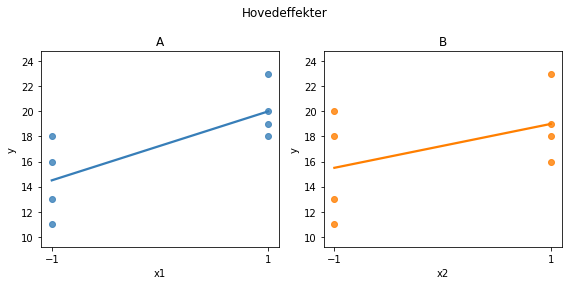

In [24]:
hovedeffektsplott(dfgjentak, k = 2)

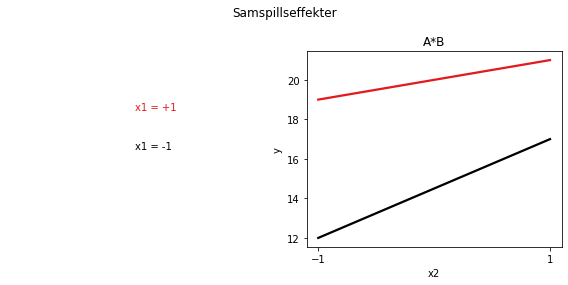

In [25]:
samspillsplott(dfgjentak, k = 2)

In [26]:
modell2 = smf.ols('y~x1+x2+x1*x2', data=dfgjentak).fit()
print(modell2.params)
#print(modell2.summary())

Intercept    17.25
x1            2.75
x2            1.75
x1:x2        -0.75
dtype: float64


Fra utskriften ser vi at estimerte koeffisienter i regresjonsmodellen er $\hat{\beta}_1 = 2.75$, $\hat{\beta}_2 = 1.75$ og $\hat{\beta}_{12} = -0.75$. Husk at i regresjonsmodeller representerer koeffisientene den forventede effekten en kovariat har på responsen når kovariaten endrer seg med én enhet (f.eks $x_1$ går fra 0 til 1), altså et *stigningstall*. I faktorielle forsøk definerer vi faktoreffekter som forventet endring i responsen $Y$ når variablen endrer nivå fra -1 til +1, altså en økning med *to* enheter. For å gå fra estimerte koeffisienter (stigningstall) i regresjonsmodellen til våre hovedeffekter og samspillseffekter kan vi derfor gange alle de estimerte koeffisientene med to: 

$\hat{A} = 2 \hat{\beta}_1 = 2 \cdot 2.75 = 5.5$

$\hat{B} = 2 \hat{\beta}_2 = 2 \cdot 1.75 = 3.5$

$\hat{AB} = 2 \hat{\beta}_{12} = 2 \cdot (-0.75) = -1.5$

Fra utskriften kan vi også direkte lese ut om effektene er signifikant forskjellige fra null ved et valgt signifikansnivå $\alpha$. Dersom koeffisientene i regresjonsmodellen er signifikant ulike null ved signifikansnivå $\alpha$ (altså $p < \alpha$, der vi finner $p$-verdien fra kolonnen `P>|t|`) er også hovedeffekter og samspillseffekter signifikant ulike 0. 

Ved å kjøre et gjentak av forsøket vårt har vi flere observasjoner og et mer pålitelig resultat. Fra modell-sammendraget kan vi lese at kun $\beta_1$ er signifikant ulik fra null ved signifikansnivå $0.05$. Dermed er det bare faktor A som ser ut til å være signifikant assositert med responsen.  Vi ser også at det som kunne se ut som en samspillseffekt i første forsøk nå har forsvunnet (ikke statistisk signifikant, se `modell2.summary()`) og vi ser omtrent parallelle linjer i samspillsplottet vårt. 

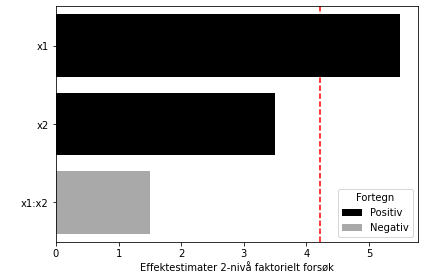

In [27]:
DOEparetoplott(modell2) # den røde stiplede linjen viser kritisk verdi for statistisk signifikans

### Huskeregel for manuell utregning av effekter

Designet og kodingen av 2-nivå faktorielle forsøk gir oss en unik mulighet til å (relativt) raskt regne ut effekter manuelt. Vi kan også bruke designet til å lage oss en huskeregel. Først presenterer vi designet (inkludert samspill) og resultatet (målinger av responsen $y$ fra ett gjentak eller gjennomsnittet over flere gjentak) i en tabell:

| Faktor A ($x_1$) | Faktor B ($x_2$) | Samspill ($x_1 \cdot x_2$) | Gjennomsnitt ($\bar{y}$)|
|:--------:|:--------:|:--------:|:--------:|
| $-1$ | $-1$ | $+1$ | $\bar{y}_1 = 12$ |
| $+1$ | $-1$ | $-1$ | $\bar{y}_2 = 19$ |
| $-1$ | $+1$ | $-1$ | $\bar{y}_3 = 17$ |
| $+1$ | $+1$ | $+1$ | $\bar{y}_4 = 21$ |

Deretter brukter vi fortegnene i de tre første kolonnene i tabellen for å regne ut effekter:

$\hat{A} = \frac{-\bar{y}_1 + \bar{y}_2 - \bar{y}_3 + \bar{y}_4}{2} = \frac{-12+19-17+21}{2} = 5.5$

$\hat{B} = \frac{-\bar{y}_1 - \bar{y}_2 + \bar{y}_3 + \bar{y}_4}{2} = \frac{-12-19+17+21}{2} = 3.5$

$\hat{AB} = \frac{\bar{y}_1 - \bar{y}_2 - \bar{y}_3 + \bar{y}_4}{2} = \frac{12-19-17+21}{2} = -1.5$


## Videre arbeid

Denne notatboken ga en kort introduksjon til notasjon og analyse i to-nivå faktorielle forsøk. Videre må du se videoer, jobbe gjennom eksempler og lese kompendiet for å forstå $2^3$ og $2^4$ forsøk, gjentak eller ikke gjentak, blokkdeling, sjekk av modellantagelser, osv.